# Displaying 3D Volumes



In [1]:
import sys
sys.path.append(r"/home/joseph/Programming/dgs-tools/python") 

#Reload all modules (except those excluded by %aimport) automatically now.
%load_ext autoreload

# all modules (except those excluded by %aimport) every time before executing the Python code typed.
%autoreload 2

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import display.display3d as display3d

## Get some data

In [3]:
cube = display3d.generate_gradient((100, 200, 300), np.array([1, 1, 1], dtype=float))
extent = [0, 1, 0, 2, 0, 3]

The base plotting function has many keyword arguments specifying the ranges, slices, and the various color attributes.

In [4]:
help(display3d.plot3d)

Help on function plot3d in module display.display3d:

plot3d(a, i0, i1, i2, seismic=False, overlay=None, overlay_alpha=0.3, ax_fontsize=18, plt_figsize=(30, 30), colorbar=True, cmap='gist_ncar', title='', aspect='auto', extent=None, axes_names=('i0', 'i1', 'i2'), hspace=0, wspace=0)
    Plot 3D cube along specified cuts.
    
    The most important optional arguments are seismic, which should generally be true, and
    extent which describes the ranges on the indices.
    
    
    Arguments:
    a -- cube (3D numpy array)
    i0 -- slice along first axis (either an index or or inside the extent provided)
    i1 -- slice along second axis (either an index or or inside the extent provided)
    i2 -- slice along third axis (either an index or or inside the extent provided)
    seismic (default False) -- flips the axes for two images. Used for plotting images
    overlay (default None) -- second cube to highlight specific sections in gray
    overlay_alpha (default 0.3) -- controls how vi

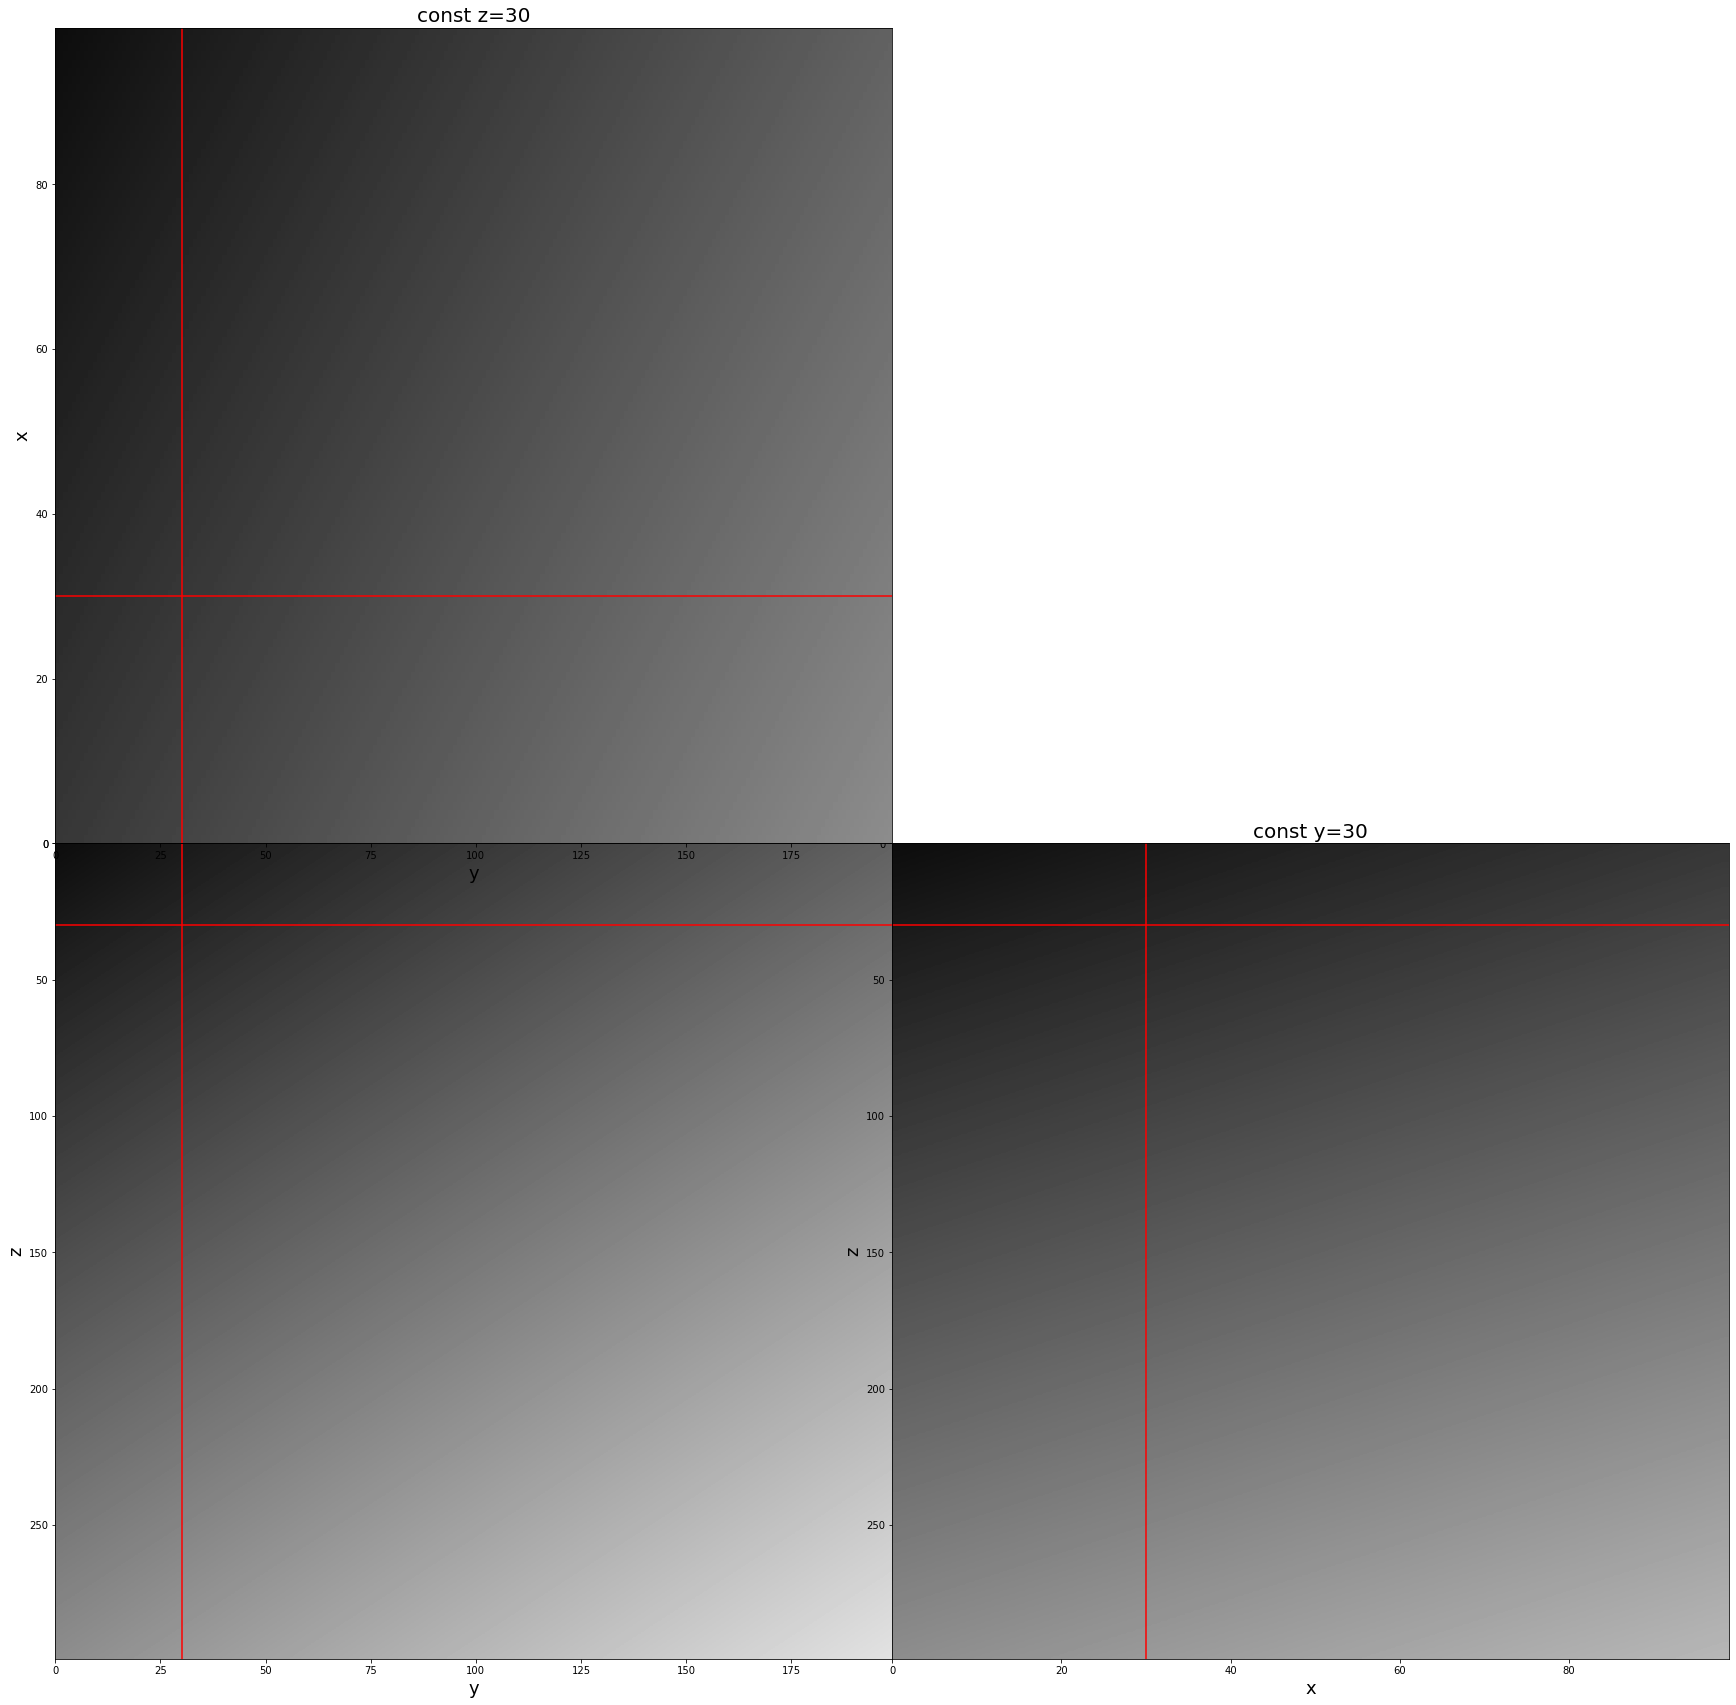

In [5]:
display3d.plot3d(cube, 30, 30, 30, seismic=True, axes_names=['x', 'y', 'z'],
              cmap='gray', colorbar=False)

Most of the time, it is more convenient to use the `plot3d_slider` function which automatically puts the sliders in place.

In [6]:
display3d.plot3d_slider(cube, seismic=True, axes_names=['x', 'y', 'z'],
              extent=extent, cmap='gray')

Displaying Volume of shape (100, 200, 300)


Output()

There are some interactions between `extent` and `aspect` ratio. Usually the best option is to work with extent first, and then adjust the aspect ratio and `hspace` and `wspace` later.

In [7]:
display3d.plot3d_slider(cube, seismic=True, axes_names=['x', 'y', 'z'],
              cmap='gray', colorbar=False, aspect=0.5, hspace=-0.5, wspace=0.2)

Displaying Volume of shape (100, 200, 300)


Output()

# Fractal

In [8]:
cube = display3d.generate_fractal((500, 500, 500), steps=20)
extent = [-1, 1, -1, 1, -1, 1]

/home/joseph/Programming/dgs-tools/python/display/display3d.py:268: RuntimeWarning: invalid value encountered in true_divide
  newv[:,0] = (3*v[:,2]**2 - v[:,0]**2 - v[:,1]**2)*v[:,0]*(v[:,0]**2 - 3*v[:,1]**2) / (v[:,0]**2 + v[:,1]**2)
/home/joseph/Programming/dgs-tools/python/display/display3d.py:269: RuntimeWarning: invalid value encountered in true_divide
  newv[:,1] = (3*v[:,2]**2 - v[:,0]**2 - v[:,1]**2)*v[:,1]*(3*v[:,0]**2 - v[:,1]**2) / (v[:,0]**2 + v[:,1]**2)


In [9]:
display3d.plot3d_slider(cube, seismic=True, axes_names=['x', 'y', 'z'],
              extent=extent, cmap='rainbow_r')

Displaying Volume of shape (500, 500, 500)


Output()

## Seismic data

We can plot directly from a filename, and then `display3d` will figure out the required names and such.

In [10]:
FILENAME = r"/home/joseph/Programming/fault-datasets-public/SUBSET_prep.segy"
if not os.path.exists(FILENAME):
    print("Hold on, path %s is invalid"%FILENAME)
        
display3d.plot3d_segyio_slider(FILENAME, colorbar=True, cmap='seismic')

Number of inlines: 203 ranging from 2199 to 2401
Number of xlines: 501 ranging from 3000 to 4000
Number of samples: 501 ranging from 0.0 to 2000.0
Extent (ilines, xlines, samples): [2199, 2401, 3000, 4000, 0.0, 2000.0]
Displaying Volume of shape (203, 501, 501)


Output()

In [11]:
display3d.plot3d_segyio_slider(FILENAME, colorbar=True, cmap='seismic', aspect=1)

Number of inlines: 203 ranging from 2199 to 2401
Number of xlines: 501 ranging from 3000 to 4000
Number of samples: 501 ranging from 0.0 to 2000.0
Extent (ilines, xlines, samples): [2199, 2401, 3000, 4000, 0.0, 2000.0]
Displaying Volume of shape (203, 501, 501)


Output()

In [12]:
import segyio

In [13]:
with segyio.open(FILENAME) as f:
    #print(f)
    cube_seismic = segyio.tools.cube(f)
    ilines = f.ilines
    xlines = f.xlines
    samples = f.samples

display3d.plot3d_slider(cube_seismic, seismic=True, axes_names=['ilines', 'xlines', 'time'],
              extent=[ilines[0], ilines[-1], xlines[0], xlines[-1], samples[0], samples[-1]],
              cmap='gray')

Displaying Volume of shape (203, 501, 501)


Output()

In [14]:
display3d.plot3d_slider(cube_seismic, seismic=True, axes_names=['ilines', 'xlines', 'time'],
              cmap='gray')

Displaying Volume of shape (203, 501, 501)


Output()